In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
term = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
term.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [3]:
term_test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
term_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [4]:
term.shape

(31647, 18)

In [5]:
term_test.shape

(13564, 17)

The dataset contains 31647 rows and 18 columns. Out of 18 variables one is target variable and the remaining 17 are independent variables

In [6]:
term.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [7]:
term.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [8]:
term_test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

There are two types of datatypes namely int64 and object type

In [9]:
term_test.drop('ID', axis = 1, inplace = True)
term_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [10]:
term.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [11]:
term.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no null values in the dataset

In [12]:
term.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

The above method gives us the number of unique values are there in the respective columns. By looking at the unique values we can say that we can remove ID column 

In [13]:
term.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


This gives us the brief details about the dataset by giving information on index type,total data columns, non null count, datatypes used and memory usage.

In [14]:
# Checking for the value counts in each column
for col in term.columns:
    print(term[col].value_counts())
    print('\n')

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

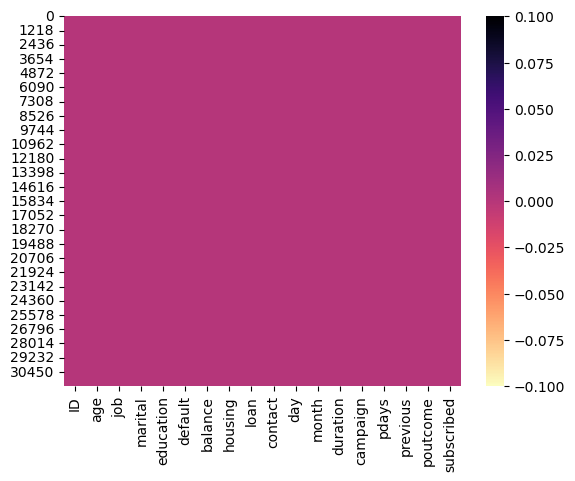

In [15]:
sns.heatmap(term.isnull(), cmap = 'magma_r')
plt.show()

In [16]:
#segregating the numeric columns and categorical columns
categorical_columns = []
numerical_columns = []
for i in term.dtypes.index:
    if term.dtypes[i] == 'object':
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)
print('Categorical columns: ', categorical_columns)
print('\n')
print('Numerical columns:', numerical_columns)

Categorical columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


Numerical columns: ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [17]:
#checking no of unique values in each column
term.nunique().to_frame("No of unique values")

,No of unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


As we observe these are the total unique values for each columns. ID column is having all the rows as unique data so we can drop the column from the dataset

In [18]:
term.drop('ID', axis = 1, inplace = True)

In [19]:
term.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [20]:
term.shape

(31647, 17)

In [21]:
term.subscribed.unique() # checking unique values present in the target column

array(['no', 'yes'], dtype=object)

There are two values in target column namely 'Yes' and 'No'

In [22]:
term.subscribed.value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

Here we can assume that 'No' stand for the customers who have not subscribed and 'Yes' stands for the customers who have subscribed for the term deposit

In [23]:
term.previous.nunique()

38

In [24]:
# statistical summary of data frame
term.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


The above data gives us the statistical representation of our dataframe. From the above description we can observe the following things:

1) There are no null values or missing values in the data frame

2) The mean value of age is greater than its median(50%) and same with the balance, duration column, this means that the data is skewed right in these columns.

3) The data in the day column shows that mean value of it is less than its median. hence the data of this column is skewed to left.

4) There is huge difference between third quartile and max value of balance, duration column. Hence there might be outliers in this column.

5) We can also see the values of std deviation, min, 25% percentile from this method.

## Data Visualizaztion------------

Univariate Analysis

no     27932
yes     3715
Name: subscribed, dtype: int64


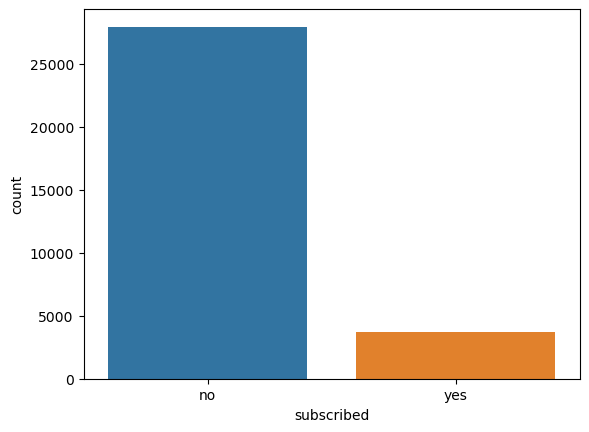

In [25]:
#Visulaizing the count of Churned customers
ax = sns.countplot(x = 'subscribed', data =term)
print(term['subscribed'].value_counts())

As we observe from the above plot there are more 'No' than 'Yes' i.e there are more depositors who have not subscribed. This leads to class imbalance in the data(Yes:No ratio has huge difference). We will rectify it by oversampling method in later part.

In [26]:
features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
len(features)

16

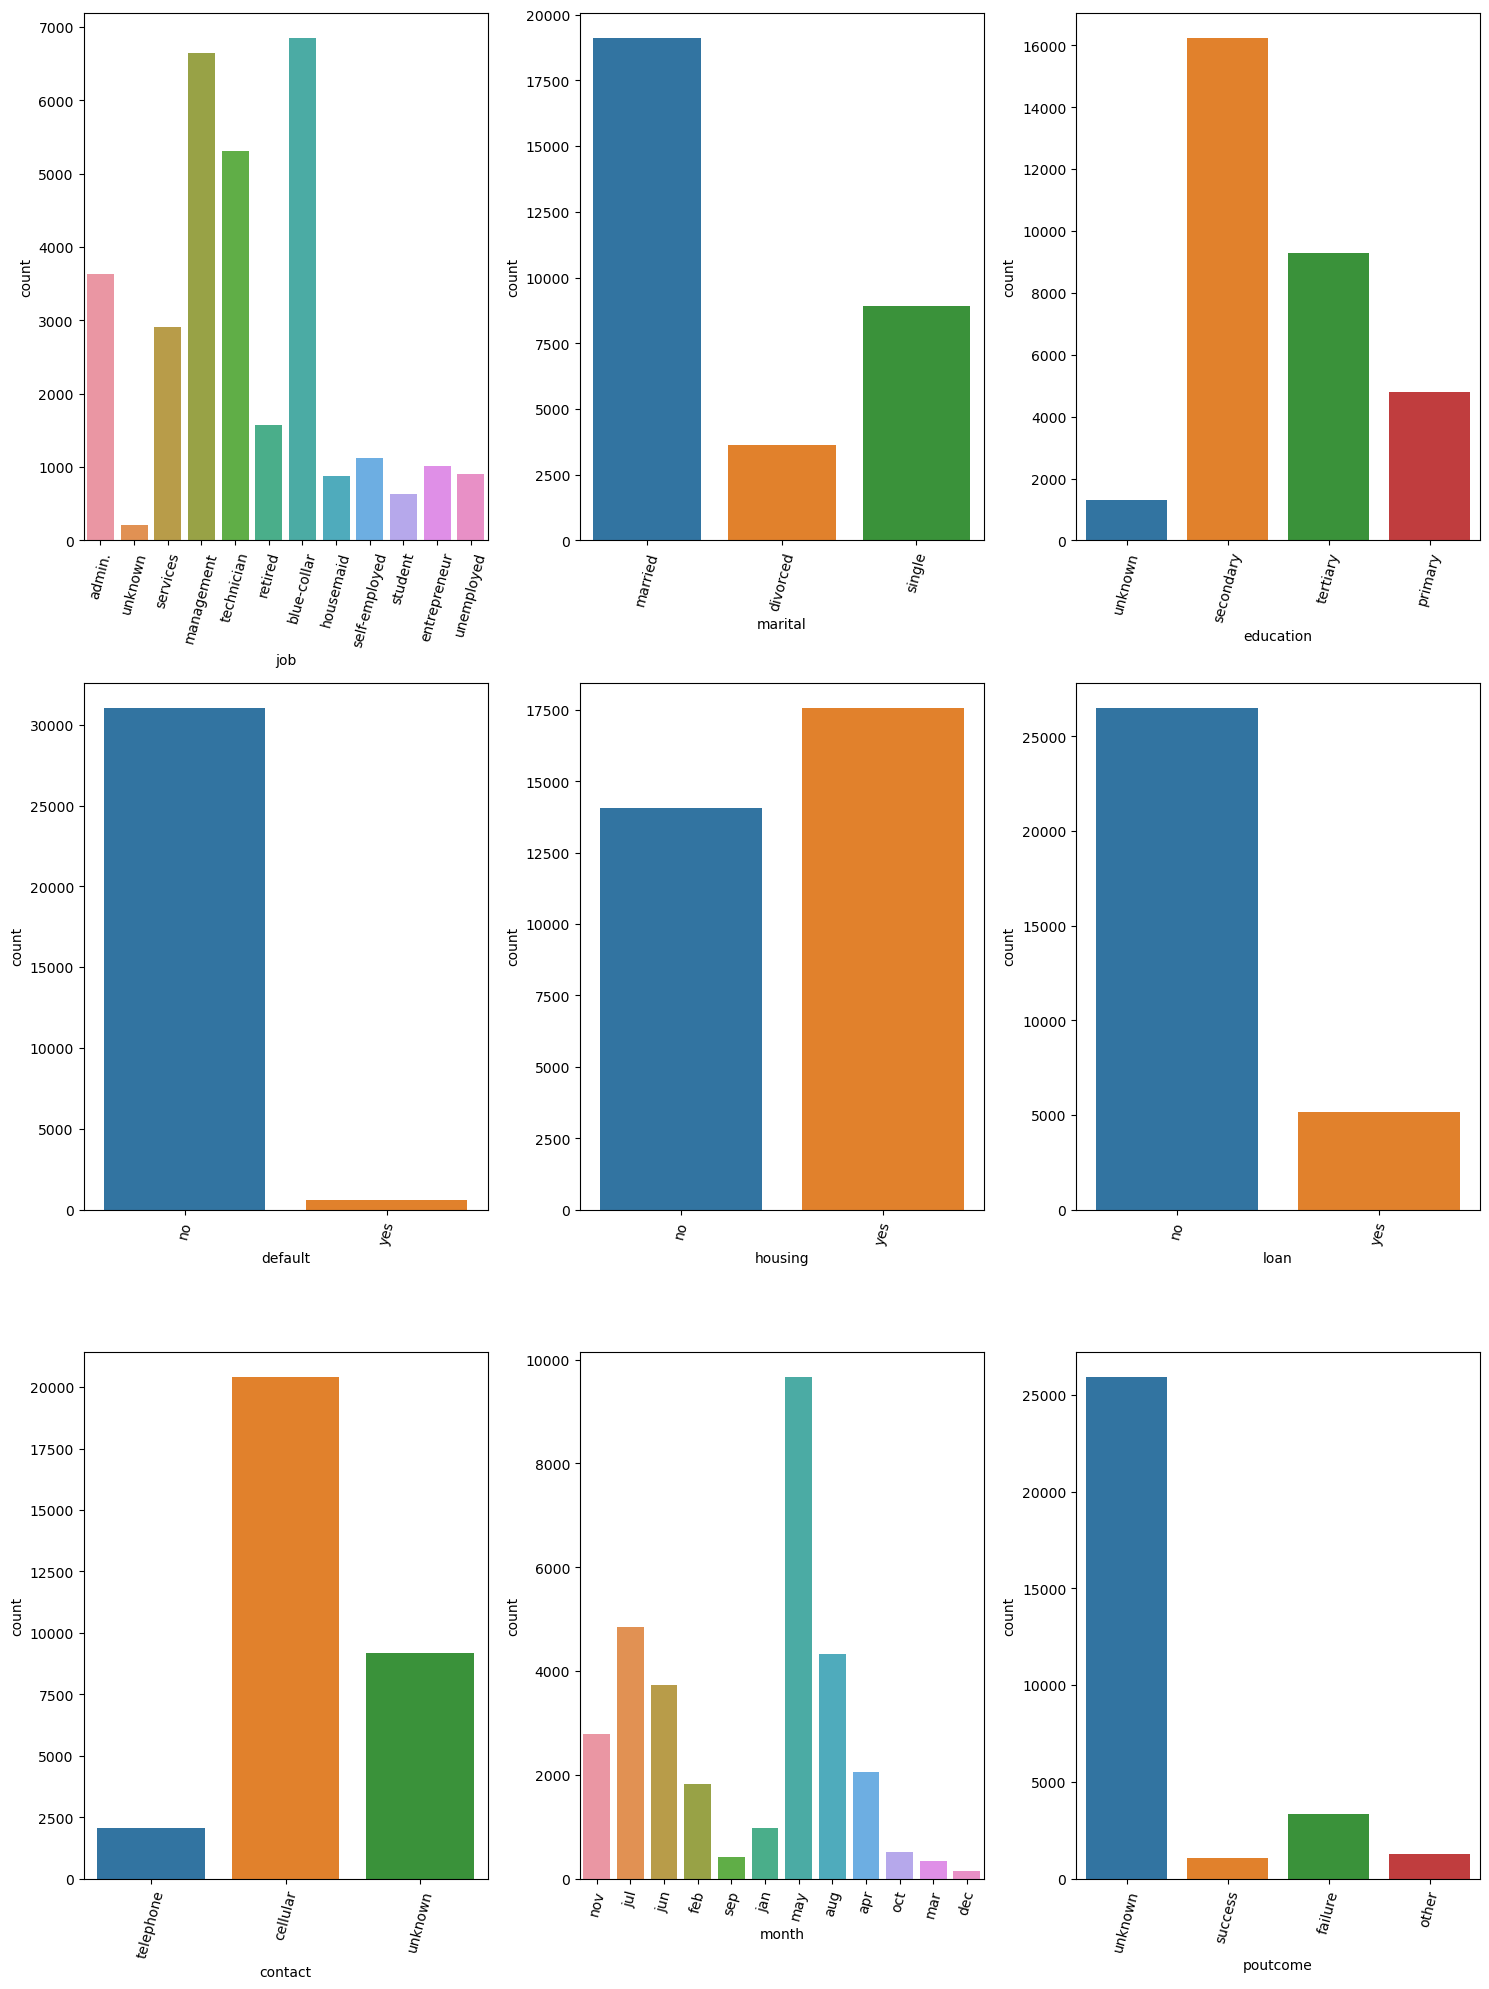

In [27]:
plt.figure(figsize = (15,20))
count =1
for i in enumerate(categorical_columns):
    if count<=9:
        plt.subplot(3,3,count)
        sns.countplot(x = i[1],data  = term)
        plt.xticks(rotation = 75)
    count+=1
plt.tight_layout()

In [28]:
num_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

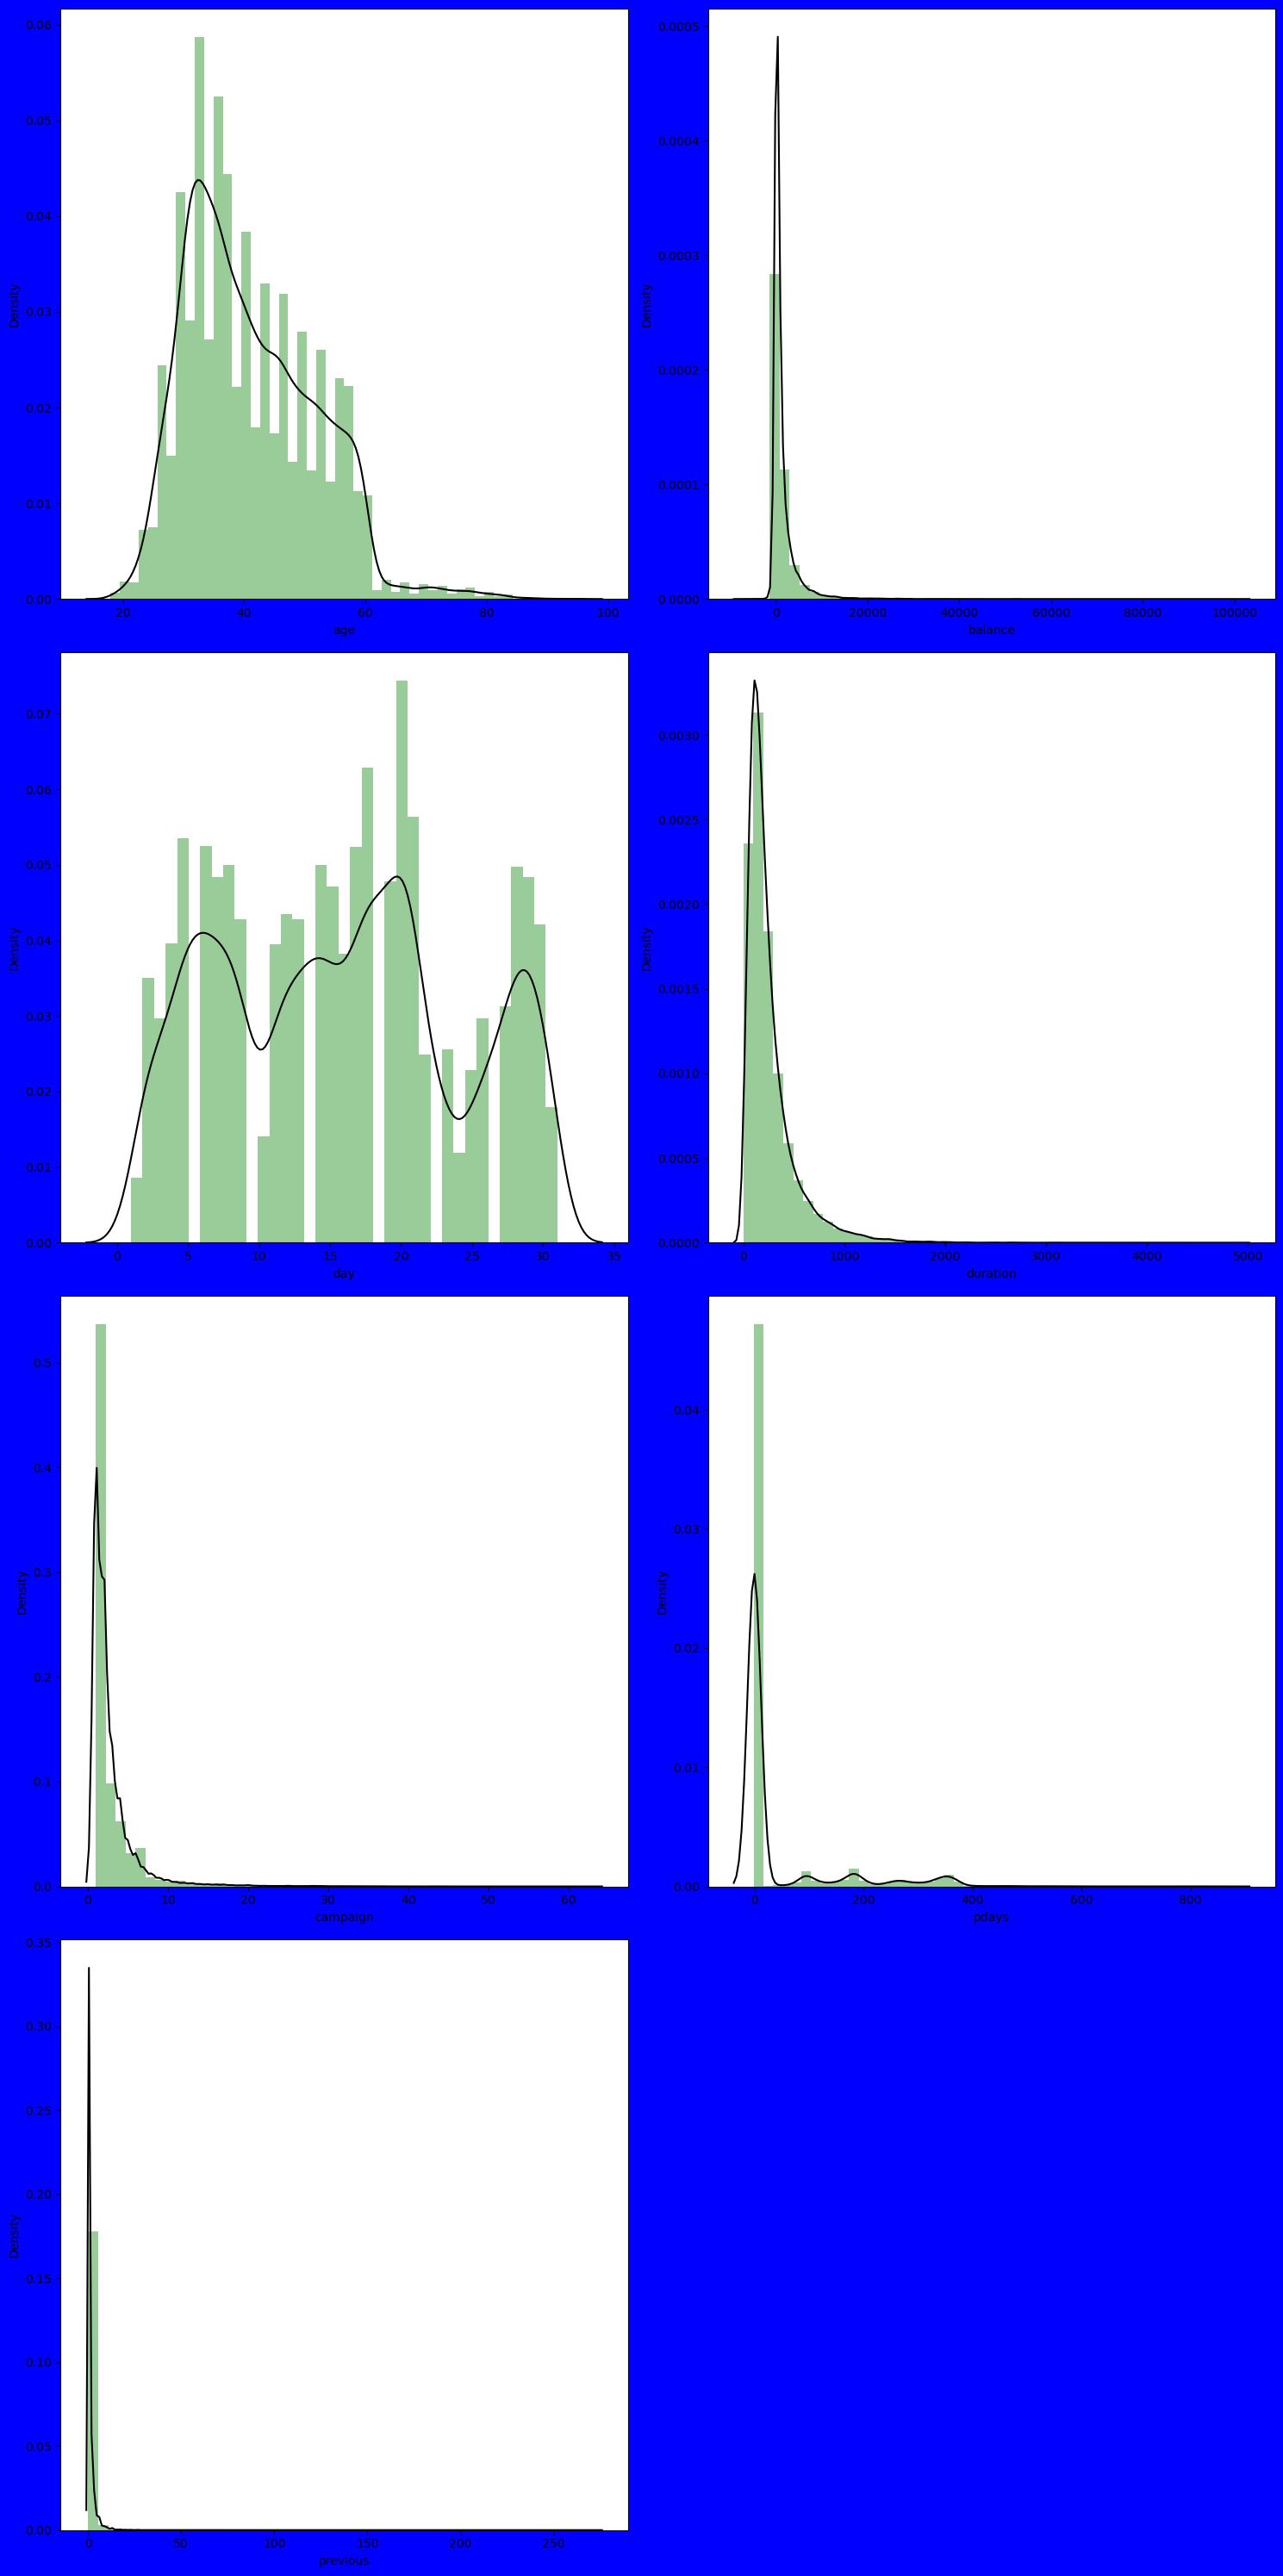

In [29]:
plt.figure(figsize = (15,30), facecolor = 'blue')
count = 1
for i in num_columns:
    if count<= 7:
        ax = plt.subplot(4,2, count)
        sns.distplot(term[i], color = 'green', kde = True,kde_kws = {'color':'black'})
        plt.xlabel(i, fontsize = 10)
    count+=1
plt.tight_layout()

#### Bivariate analysis

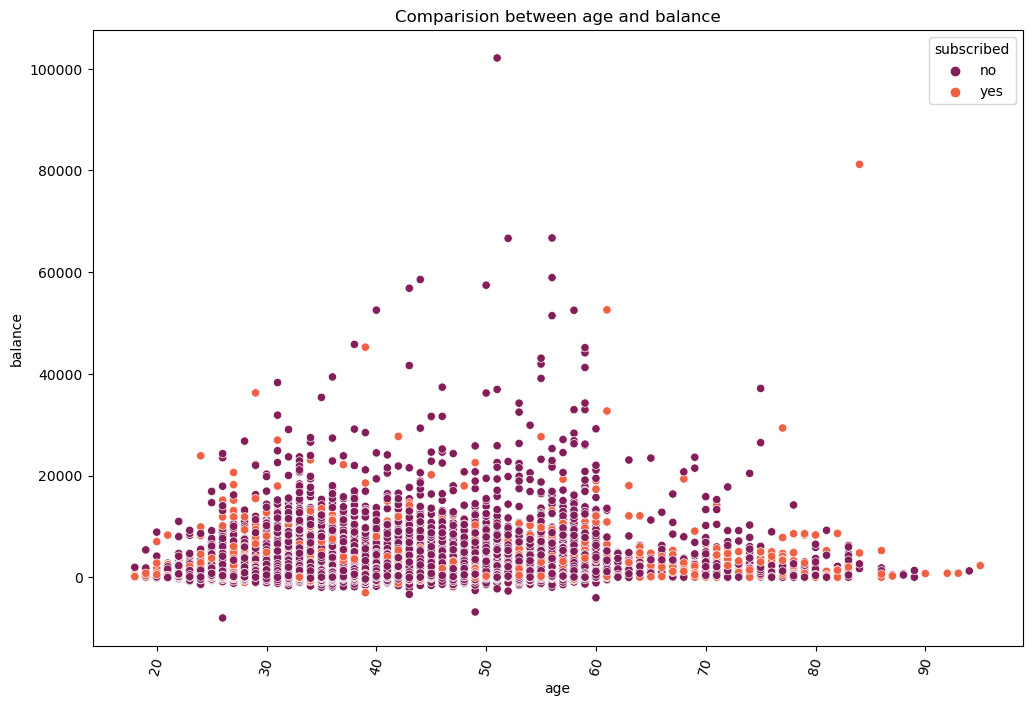

In [30]:
ax = plt.figure(figsize = (12,8))
plt.title('Comparision between age and balance')
sns.scatterplot(x = 'age', y = 'balance', palette = 'rocket', data = term, hue = 'subscribed')
plt.xticks(rotation = 75)
plt.show()

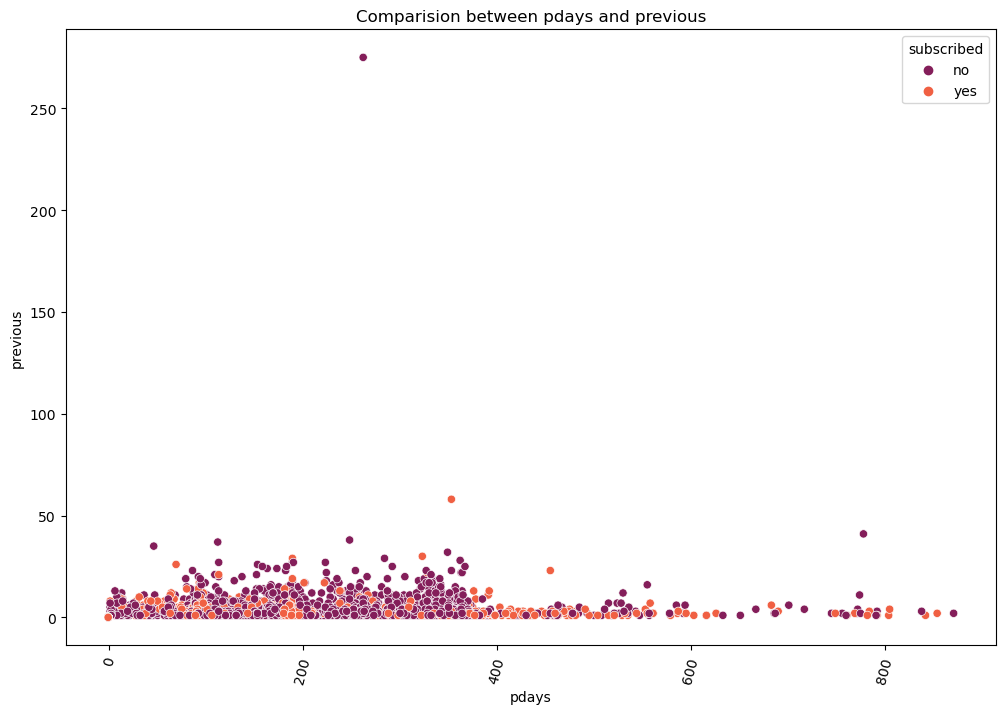

In [31]:
ax = plt.figure(figsize = (12,8))
plt.title('Comparision between pdays and previous')
sns.scatterplot(x = 'pdays', y = 'previous', palette = 'rocket', data = term, hue = 'subscribed')
plt.xticks(rotation = 75)
plt.show()

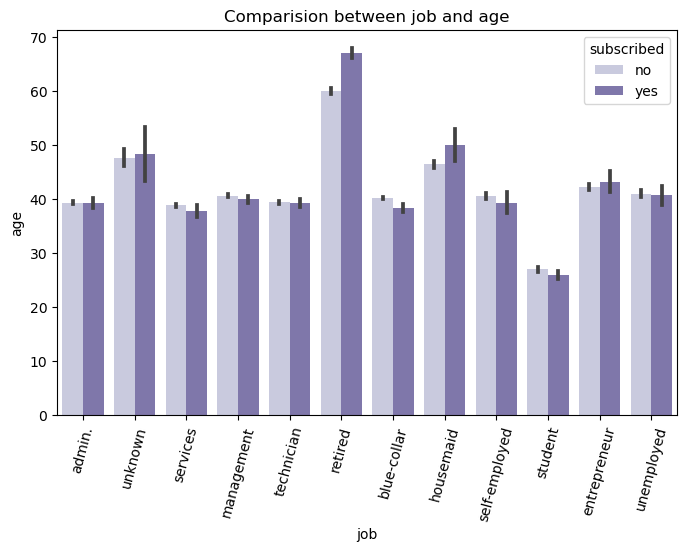

In [32]:
ax = plt.figure(figsize = (8,5))
plt.title('Comparision between job and age')
sns.barplot(x = 'job', y = 'age', palette = 'Purples', data = term, hue = 'subscribed')
plt.xticks(rotation = 75)
plt.show()

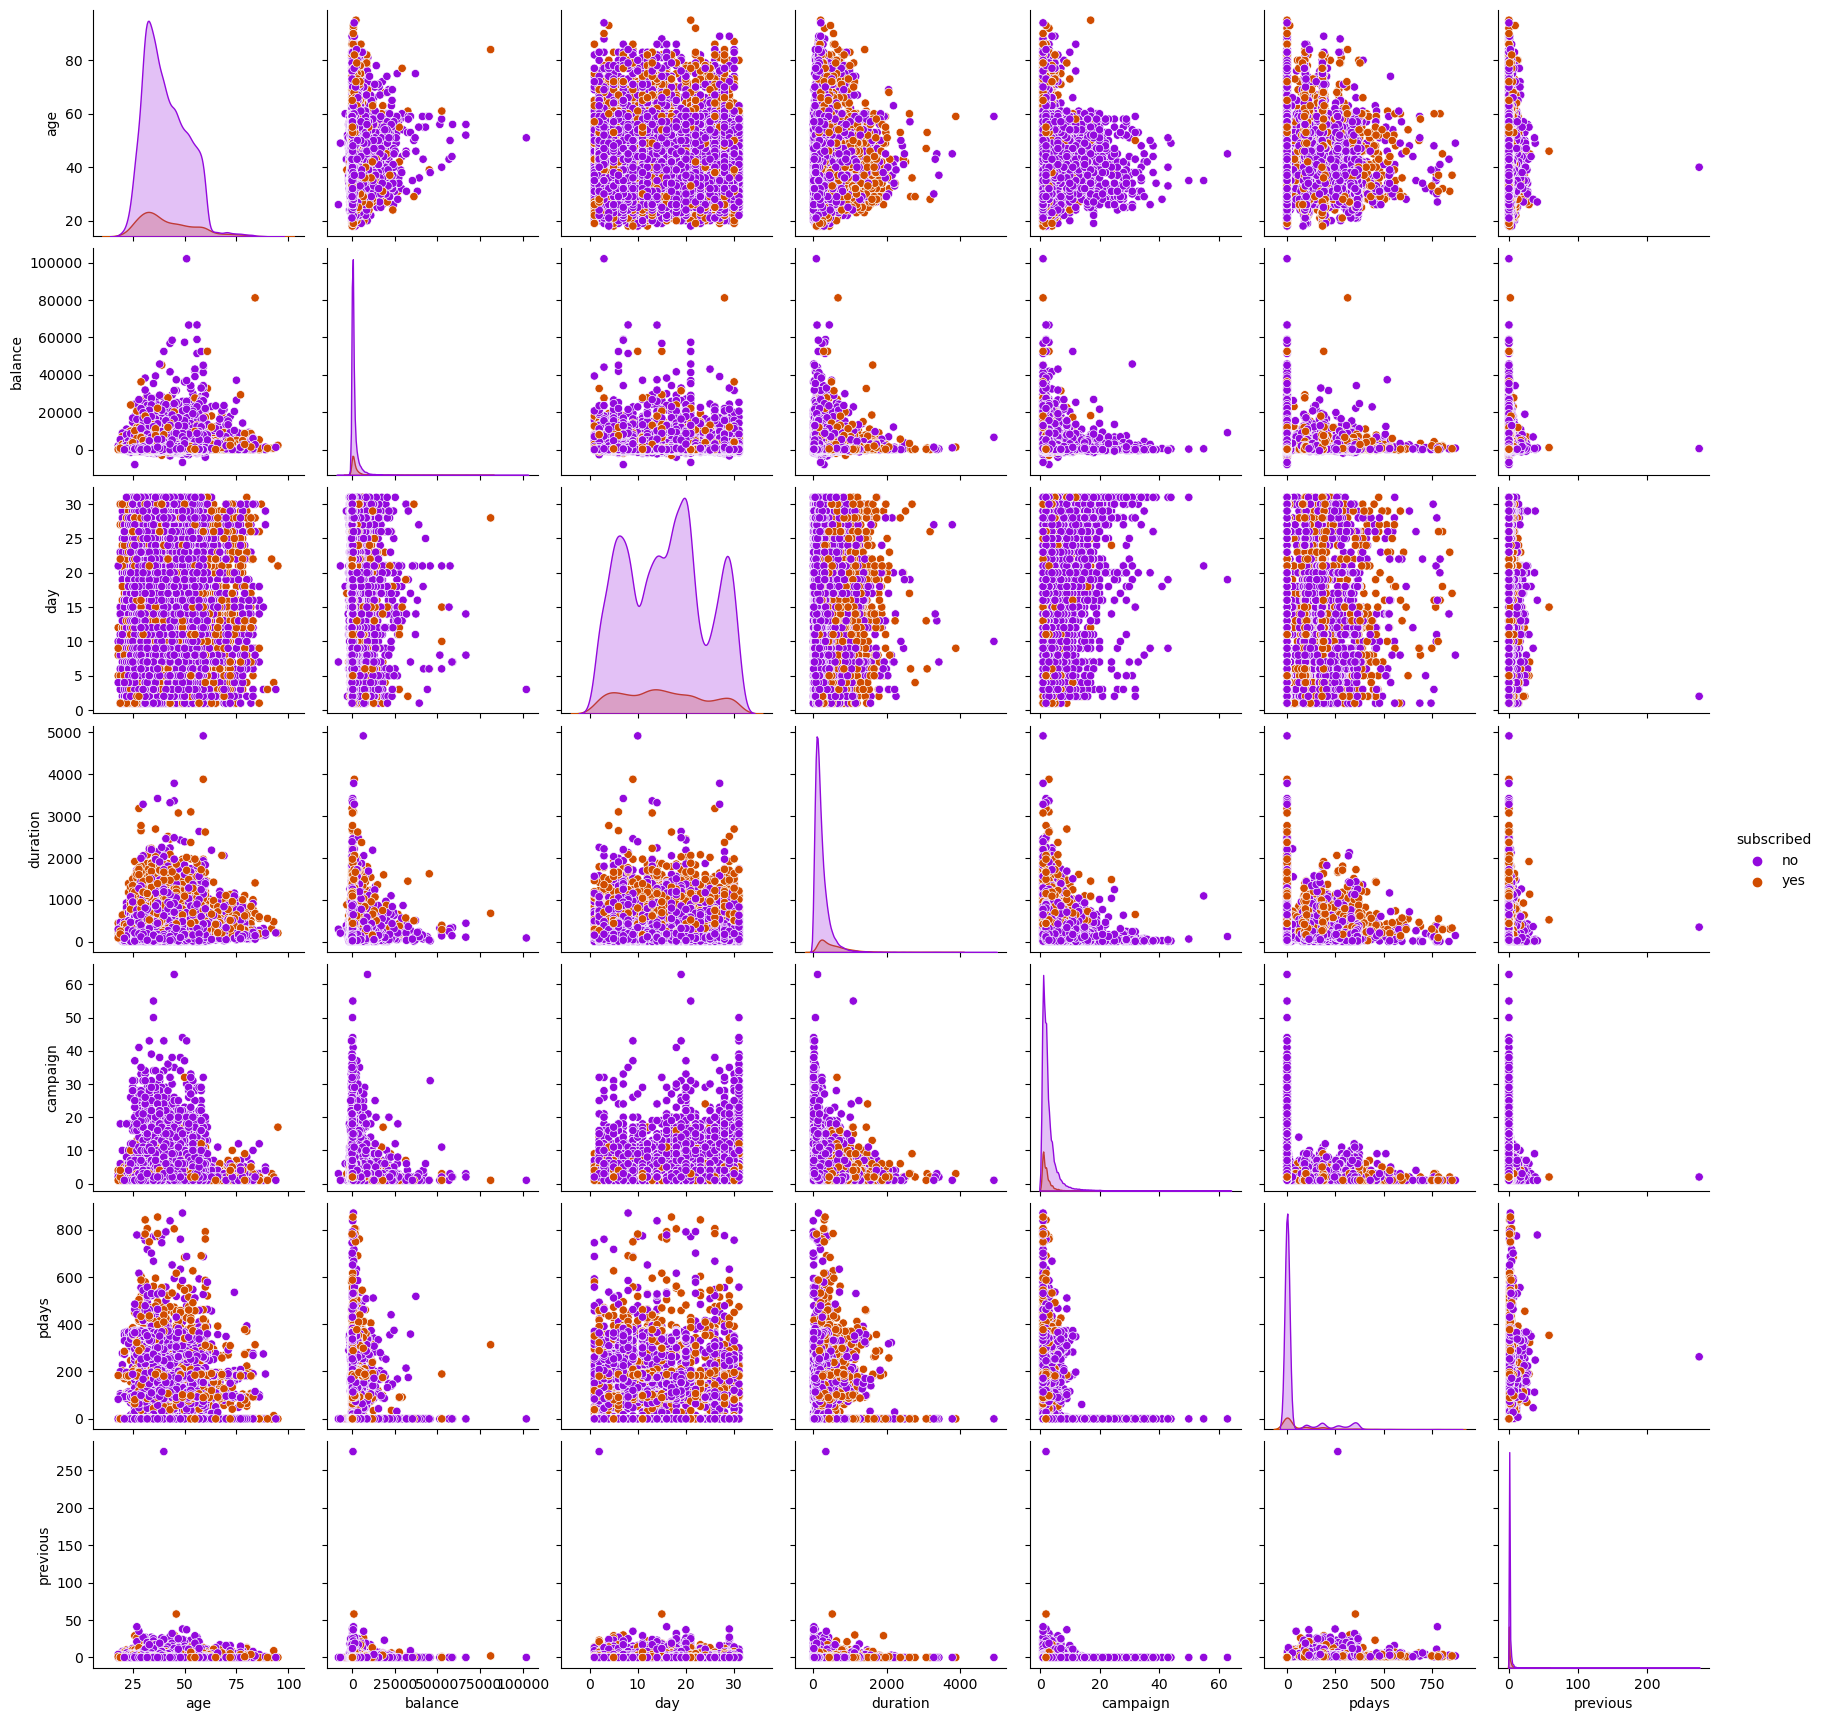

In [33]:
sns.pairplot(term, hue = 'subscribed', palette = 'gnuplot')
plt.show()


1. The pairplot gives the pairwise relation between the features on the basis of target variable'subscribed'.
   On the diagonal we can notice the distribution plots.
2. It seems that there are outliers by looking at these pairplots however we check the outliers using boxplot.
3. By looking at the previous column we can observe that its not having any relationship with the other features so we might remove the previous column

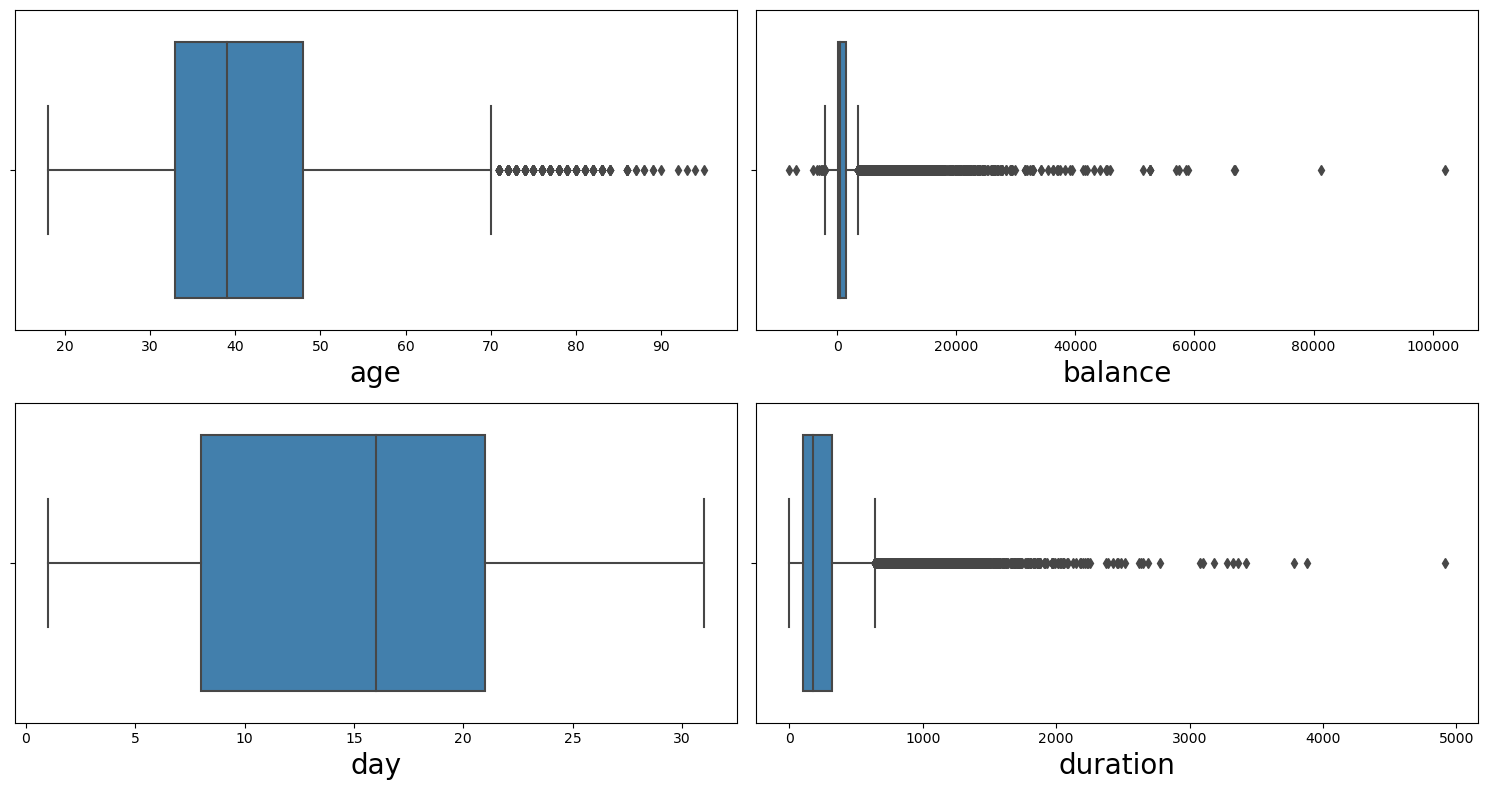

In [34]:
#check for the outliers
plt.figure(figsize = (15,8))
point= 1
for i in num_columns:
    if point<=4:
        ax = plt.subplot(2,2,point)
        sns.boxplot(term[i], palette = 'tab20c')
        plt.xlabel(i, fontsize = 20)
        plt.yticks(rotation = 10, fontsize = 10)
    point+=1
plt.tight_layout()

The age and balance columns have outliers. We remove outliers using zscore method in the later part

In [35]:
term.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [36]:
# Checking skewness
term.skew()

age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

In [37]:
# removing skewness using cuberoot method
term.age = np.cbrt(term.age)
term.balance = np.cbrt(term.balance)
term.duration = np.cbrt(term.duration)
term.campaign = np.cbrt(term.campaign)
term.pdays = np.cbrt(term.pdays)

In [38]:
term.skew()

age          0.286363
balance     -0.086014
day          0.087185
duration     0.647275
campaign     1.667938
pdays        1.779036
previous    49.302348
dtype: float64

## Encoding categorical columns

Since our machine cannot detect the string values present in categorical data  we are encoding the categorical data with using one of the encoder techniques

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
oe = LabelEncoder()
for i in term.columns:
    if term[i].dtypes == 'object':
        term[i] = oe.fit_transform(term[i].values.reshape(-1,1))

In [66]:
for i in term_test.columns:
    if term_test[i].dtypes == 'object':
        term_test[i] = oe.fit_transform(term_test[i].values.reshape(-1,1))

In [41]:
term

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,3.825862,0,1,3,0,12.456918,0,0,1,19,9,3.530348,1.259921,-1.000000,0,3,0
1,3.141381,11,1,1,0,1.442250,0,0,0,20,5,4.497941,1.259921,-1.000000,0,3,0
2,3.000000,7,1,1,0,9.622603,1,0,0,18,5,6.214465,1.000000,-1.000000,0,3,0
3,3.848501,4,0,2,0,14.868480,0,0,0,22,6,9.535417,1.000000,4.379519,3,2,1
4,3.141381,9,1,1,0,4.918685,1,0,0,4,3,7.243156,1.000000,-1.000000,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,3.072317,4,2,2,0,0.000000,1,0,0,12,8,4.876999,1.259921,-1.000000,0,3,0
31643,3.756286,4,0,2,0,7.243156,0,1,0,5,6,7.594363,1.259921,-1.000000,0,3,1
31644,3.174802,4,2,2,0,6.782423,0,0,0,7,1,3.332222,1.442250,-1.000000,0,3,0
31645,3.848501,9,1,1,0,6.082202,1,0,1,15,8,2.802039,1.912931,6.958943,12,0,0


In [42]:
 a = term[['age', 'balance','duration']] # we cannot apply zscore for categorical data and target column hence declaring in separate list
from scipy.stats import zscore
z = np.abs(zscore(a))
z.shape

(31647, 3)

In [43]:
np.where(z>3)

(array([  109,   149,   149,   179,   333,   400,   597,   597,   717,
          746,   848,   920,   986,  1002,  1089,  1094,  1178,  1231,
         1240,  1376,  1398,  1422,  1423,  1462,  1498,  1498,  1539,
         1601,  1627,  1660,  1684,  1997,  2023,  2080,  2297,  2471,
         2599,  2610,  2646,  2654,  2688,  2714,  2718,  2794,  2909,
         2911,  2949,  3158,  3179,  3182,  3267,  3488,  3527,  3645,
         3690,  3785,  3976,  4091,  4239,  4372,  4523,  4548,  4577,
         4600,  4612,  4679,  4715,  4725,  4741,  4747,  4767,  4789,
         4837,  4853,  4871,  4893,  4910,  4932,  4945,  5012,  5194,
         5217,  5276,  5379,  5440,  5448,  5451,  5463,  5728,  5784,
         5834,  5883,  5904,  5958,  6026,  6062,  6105,  6110,  6166,
         6167,  6216,  6220,  6265,  6276,  6285,  6290,  6320,  6366,
         6390,  6400,  6491,  6514,  6552,  6589,  6641,  6646,  6688,
         6692,  6734,  6917,  7019,  7088,  7117,  7138,  7340,  7481,
      

In [44]:
# removing all the zscores greater than 3
term_train = term[(z<3).all(axis=1)]
term_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,3.825862,0,1,3,0,12.456918,0,0,1,19,9,3.530348,1.259921,-1.000000,0,3,0
1,3.141381,11,1,1,0,1.442250,0,0,0,20,5,4.497941,1.259921,-1.000000,0,3,0
2,3.000000,7,1,1,0,9.622603,1,0,0,18,5,6.214465,1.000000,-1.000000,0,3,0
3,3.848501,4,0,2,0,14.868480,0,0,0,22,6,9.535417,1.000000,4.379519,3,2,1
4,3.141381,9,1,1,0,4.918685,1,0,0,4,3,7.243156,1.000000,-1.000000,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31641,3.332222,9,2,2,0,10.939057,0,0,2,6,6,7.617412,1.259921,-1.000000,0,3,0
31642,3.072317,4,2,2,0,0.000000,1,0,0,12,8,4.876999,1.259921,-1.000000,0,3,0
31643,3.756286,4,0,2,0,7.243156,0,1,0,5,6,7.594363,1.259921,-1.000000,0,3,1
31644,3.174802,4,2,2,0,6.782423,0,0,0,7,1,3.332222,1.442250,-1.000000,0,3,0


In [45]:
term_train.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31180.000000,31180.000000,31180.000000,31180.000000,31180.000000,31180.000000,31180.000000,31180.000000,31180.000000,31180.000000,31180.000000,31180.000000,31180.000000,31180.000000,31180.00000,31180.000000,31180.000000
mean,3.418440,4.327486,1.168954,1.224888,0.018473,7.355335,0.557986,0.162957,0.644548,15.840154,5.530725,5.809213,1.304532,0.240139,0.57399,2.565555,0.113085
std,0.287648,3.279682,0.606473,0.747706,0.134658,6.420600,0.496634,0.369332,0.900473,8.340952,3.001211,1.672966,0.348646,2.685693,2.42754,0.982920,0.316702
min,2.620741,0.000000,0.000000,0.000000,0.000000,-12.284851,0.000000,0.000000,0.000000,1.000000,0.000000,1.259921,1.000000,-1.000000,0.00000,0.000000,0.000000
25%,3.207534,1.000000,1.000000,1.000000,0.000000,4.140818,0.000000,0.000000,0.000000,8.000000,3.000000,4.687548,1.000000,-1.000000,0.00000,3.000000,0.000000
50%,3.391211,4.000000,1.000000,1.000000,0.000000,7.623152,1.000000,0.000000,0.000000,16.000000,6.000000,5.635741,1.259921,-1.000000,0.00000,3.000000,0.000000
75%,3.634241,7.000000,2.000000,2.000000,0.000000,11.205503,1.000000,0.000000,2.000000,21.000000,8.000000,6.796884,1.442250,-1.000000,0.00000,3.000000,0.000000
max,4.290840,11.000000,2.000000,3.000000,1.000000,27.228513,1.000000,1.000000,2.000000,31.000000,11.000000,11.106405,3.979057,9.550059,275.00000,3.000000,1.000000


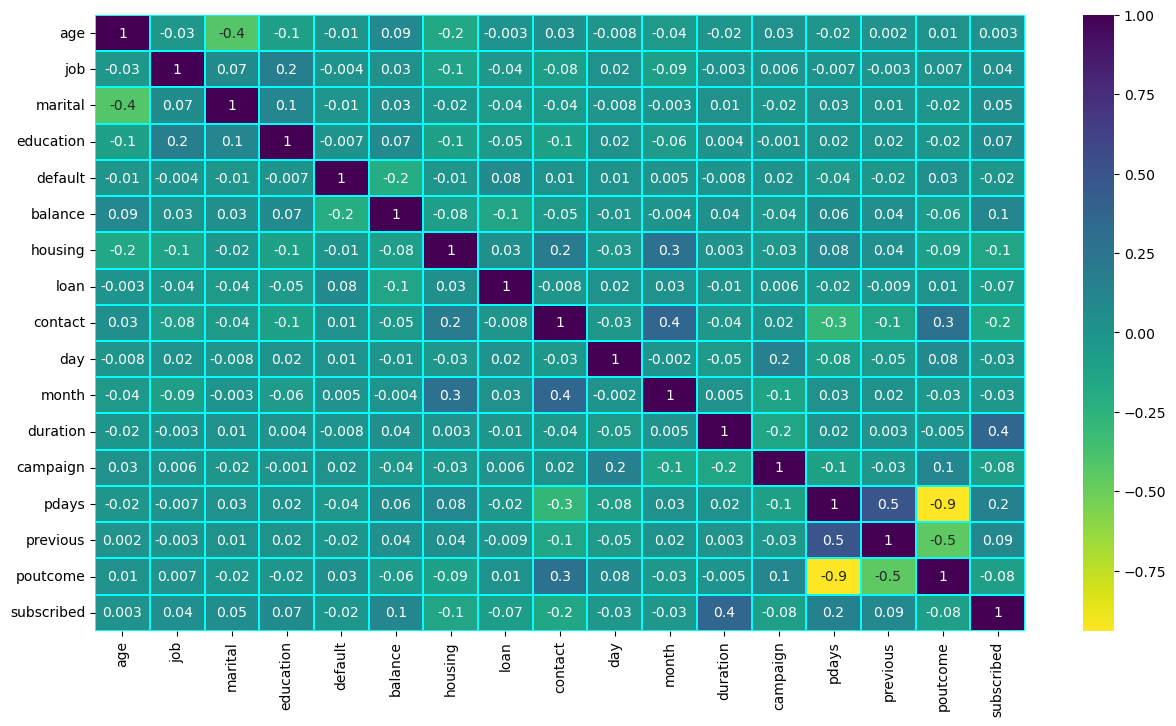

In [46]:
cor = term_train.corr()
plt.figure(figsize = (15,8))
sns.heatmap(cor,linewidths = 0.1, fmt = ".1g",linecolor = "cyan", annot = True, cmap = 'viridis_r')
plt.yticks(rotation =   0)
plt.show()

This heatmap shows the correlation matrix by visualising the data. We can  observe the relaton between  feature and feature to label.
1. There is  no much positive correlation  between the target and features
2. The columns pdays and poutcome are highly negatively correlated to eac other.
3. The pdays and previous columns are positively intermediate correlated.
4. Theprevious and poutcome are negatively intermediate correlated.

In [47]:
cor['subscribed'].sort_values(ascending = False)

subscribed    1.000000
duration      0.364587
pdays         0.156452
balance       0.098403
previous      0.088738
education     0.071385
marital       0.049305
job           0.038298
age           0.002671
default      -0.018905
month        -0.028963
day          -0.031184
loan         -0.073647
poutcome     -0.083986
campaign     -0.084321
housing      -0.142834
contact      -0.153590
Name: subscribed, dtype: float64

Text(0.5, 1.0, 'Correlation between label and features using barplot')

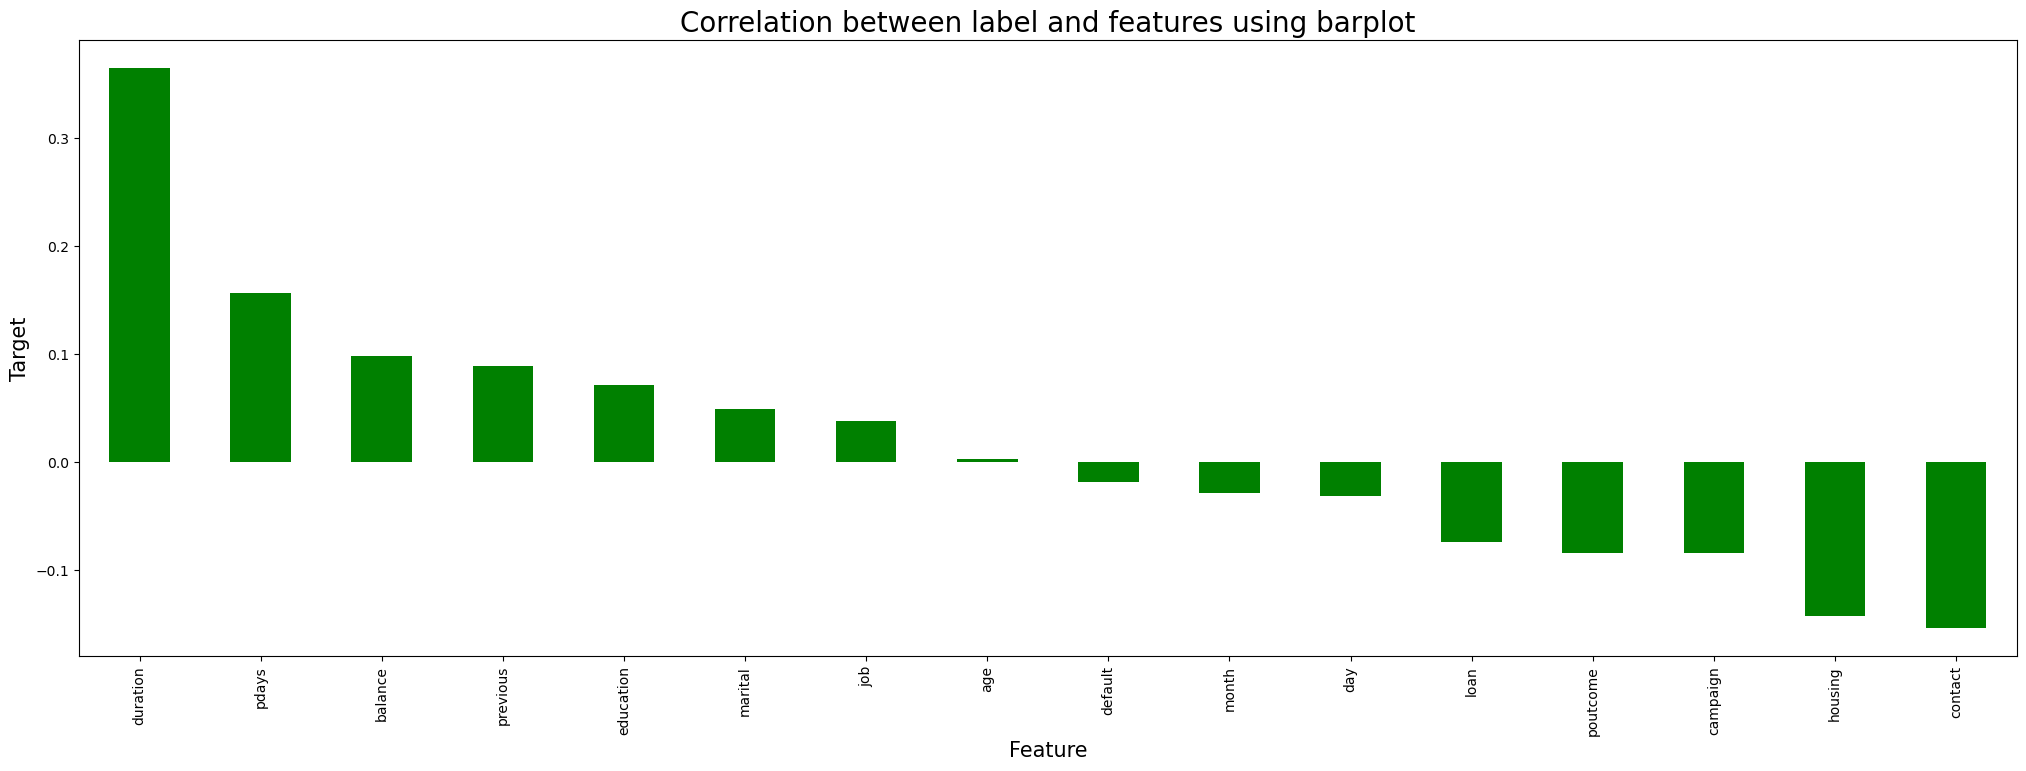

In [48]:
plt.figure(figsize = (25,8))
term_train.corr()['subscribed'].sort_values(ascending = False).drop(['subscribed']).plot(kind = 'bar', color = 'green')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title("Correlation between label and features using barplot", fontsize = 20)

From the above plot we can observe the positive and negative correlation between feature and target where subscribed and duration having highest positive correlation and subscribed and contact are having highest negative correlation. job, ageand default columns have less correlation

In [49]:
x = term_train.drop('subscribed', axis = 1)
y = term_train['subscribed']

In [50]:
#Feature scaling using standardization, we use scaling method inorder to reduce the biasness
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.416413,-1.319505,-0.278590,2.374114,-0.13719,0.794578,-1.123553,-0.441228,0.394746,0.378841,1.155977,-1.362192,-0.127956,-0.461765,-0.236453,0.442002
1,-0.963204,2.034533,-0.278590,-0.300775,-0.13719,-0.920970,-1.123553,-0.441228,-0.715800,0.498734,-0.176840,-0.783813,-0.127956,-0.461765,-0.236453,0.442002
2,-1.454718,0.814883,-0.278590,-0.300775,-0.13719,0.353130,0.890034,-0.441228,-0.715800,0.258949,-0.176840,0.242240,-0.873483,-0.461765,-0.236453,0.442002
3,1.495117,-0.099854,-1.927493,1.036670,-0.13719,1.170181,-1.123553,-0.441228,-0.715800,0.738518,0.156364,2.227340,-0.873483,1.541296,0.999386,-0.575392
4,-0.963204,1.424708,-0.278590,-0.300775,-0.13719,-0.379511,0.890034,-0.441228,-0.715800,-1.419543,-0.843248,0.857140,-0.873483,-0.461765,-0.236453,0.442002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31175,-0.299740,1.424708,1.370314,1.036670,-0.13719,0.558169,-1.123553,-0.441228,1.505292,-1.179759,0.156364,1.080851,-0.127956,-0.461765,-0.236453,0.442002
31176,-1.203306,-0.099854,1.370314,1.036670,-0.13719,-1.145602,0.890034,-0.441228,-0.715800,-0.460405,0.822773,-0.557231,-0.127956,-0.461765,-0.236453,0.442002
31177,1.174528,-0.099854,-1.927493,1.036670,-0.13719,-0.017472,-1.123553,2.266404,-0.715800,-1.299651,0.156364,1.067074,-0.127956,-0.461765,-0.236453,0.442002
31178,-0.847014,-0.099854,1.370314,1.036670,-0.13719,-0.089232,-1.123553,-0.441228,-0.715800,-1.059866,-1.509657,-1.480622,0.395014,-0.461765,-0.236453,0.442002


we have standardized the data using StandardScaler method to reduce biasness

In [52]:
#Checking varianceinfationfactor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
    for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.291305,age
1,1.050419,job
2,1.245211,marital
3,1.065593,education
4,1.045854,default
5,1.088422,balance
6,1.177122,housing
7,1.030577,loan
8,1.334096,contact
9,1.039407,day


In [53]:
y.value_counts()

0    27654
1     3526
Name: subscribed, dtype: int64

In [54]:
#Oversampling the data SMOTE is applied on feature and target variable and not on training data
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(x,y)

In [55]:
#checking value counts after oversampling
y.value_counts()

0    27654
1    27654
Name: subscribed, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range(1,200):
    x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test, pred)
    if accu>maxAccu:
        maxAccu = accu
        maxRs =i
print("Best accuracy is", maxAccu, "at random_state", maxRs)

Best accuracy is 0.8255891038389682 at random_state 163


In [57]:
#Creating train test split at maxRs
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30, random_state = maxRs)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,accuracy_score

In [59]:
#Checking accuracy score for logisticregression
ls = LogisticRegression()
ls.fit(x_train,y_train)
predd = ls.predict(x_test)
print(accuracy_score(y_test,predd))
print(confusion_matrix(y_test,predd))
print(classification_report(y_test,predd))

0.8255891038389682
[[6788 1550]
 [1344 6911]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      8338
           1       0.82      0.84      0.83      8255

    accuracy                           0.83     16593
   macro avg       0.83      0.83      0.83     16593
weighted avg       0.83      0.83      0.83     16593



In [60]:
Final_model = LogisticRegression()
Final_model.fit(x_train,y_train)
predict = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

49.48472247333213


In [61]:
#saving the model using .pkl
import joblib
joblib.dump(Final_model,"term_deposit.pkl")


['term_deposit.pkl']

In [68]:
#predicting the saved model
model = joblib.load("term_deposit.pkl")

#prediction
prediction = model.predict(term_test)
prediction

array([1, 1, 1, ..., 1, 1, 1])